In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [2]:
df1=pd.read_csv("exercise.csv")
df2=pd.read_csv("calories.csv")

In [3]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68.0,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20.0,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69.0,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34.0,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27.0,154.0,58.0,10.0,81.0,39.8


In [4]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Joining two given datasets 

In [5]:
df=pd.concat([df1, df2['Calories']], axis=1)

In [6]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68.0,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27.0,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20.0,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27.0,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43.0,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78.0,193.0,97.0,2.0,84.0,38.3,11.0


Checking whether the dataset contains missing values or not

In [7]:
df.isnull().sum()

User_ID        0
Gender         9
Age           18
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64

In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,14982.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.794620,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.979448,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,40.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Filling out Missing Data

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df.isnull().sum()

User_ID       0
Gender        9
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
df['Gender'].mode()

0    female
dtype: object

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Visulalising the data

C:\Users\Adimin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

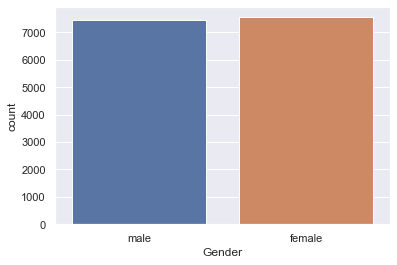

In [14]:
sns.set()
sns.countplot(df['Gender'])

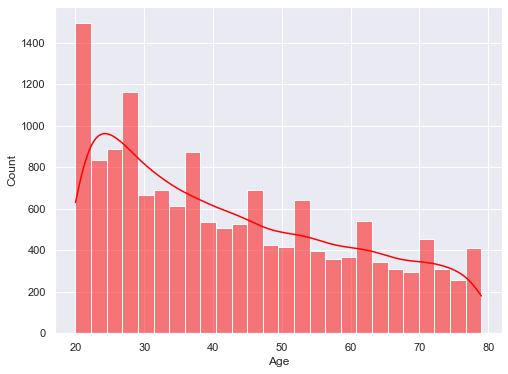

In [15]:
# Knowing which age group people has the most count in the given dataset
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],color="Red", kde=True)
plt.show()

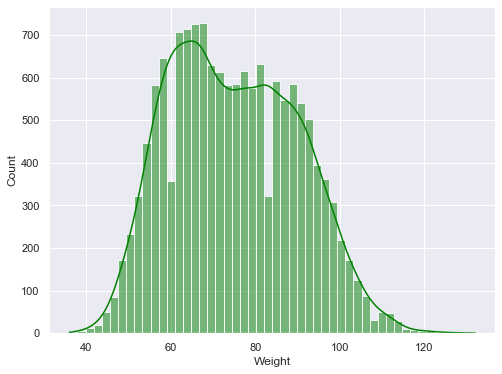

In [16]:
#Knowing which weight group people has the most count in the given dataset
plt.figure(figsize=(8,6))
sns.histplot(df['Weight'],color="Green", kde=True)
plt.show()

Correlation

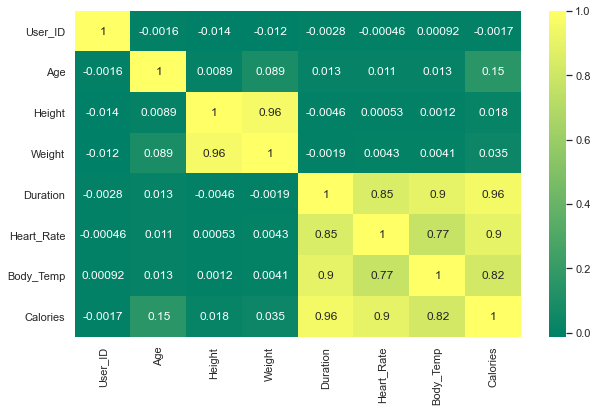

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='summer',annot=True)
plt.show()

Now converting text data into numerical values

In [18]:
df.replace({"Gender":{'male':0, 'female':1}}, inplace= True )

In [19]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68.0,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27.0,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20.0,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27.0,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43.0,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78.0,193.0,97.0,2.0,84.0,38.3,11.0


Now removing unnecessary coulmn

In [20]:
df.drop(columns='User_ID')

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68.0,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27.0,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20.0,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27.0,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43.0,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78.0,193.0,97.0,2.0,84.0,38.3,11.0


Now Splitting dataset into Features and Target

In [21]:
x=df.drop(columns='Calories', axis=1)
y=df['Calories']


Train-Test Splitting

In [22]:
train_x, test_x, train_y, test_y= train_test_split(x,y, test_size=0.2, random_state=2)

In [23]:
print(x.shape, train_x.shape, test_x.shape)

(15000, 8) (12000, 8) (3000, 8)


Model Selection

In [24]:
from xgboost import XGBRegressor

In [25]:
model=XGBRegressor()

In [26]:
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
pred_data=model.predict(test_x)
pred_data

array([128.45282 , 220.99782 ,  39.17133 , ..., 141.99532 ,  22.63011 ,
        89.974754], dtype=float32)

In [28]:
test_y

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

In [29]:
model.score(test_x, test_y)

0.9986716665679696

In [30]:
model.score(train_x, train_y)

0.9995115916416455

In [31]:
mae= metrics.mean_absolute_error(test_y,pred_data)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.5846835721731185


In [32]:
input_data=(14733363,0,68,190.0,94.0,29.0,105.0,40.8)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)
print("The Predicted burnt calories are : ", prediction[0])


[230.18799]
The Predicted burnt calories are :  230.18799


In [33]:
input_data=(11751526,0,63,173.0,79.0,18.0,92.0,40.5)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)
print("The Predicted burnt calories are : ", prediction[0])

[99.58323]
The Predicted burnt calories are :  99.58323


SAVING MODEL

In [34]:
import pickle

In [35]:
pickle.dump(model, open('Calorie Burnt prediction using ML.pkl', 'wb'))